<a href="https://colab.research.google.com/github/Santiago-Valencia/LEARNING_ML/blob/master/2_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK WITH A DATA SET OF NUMERICAL DIGITS**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
# from tensorflow import set_random_seed

import numpy as np
import matplotlib.pyplot as plt

#Reproducible Results

In [2]:
import os
import random as rn
os.environ['PYTHONHASHSEED'] = '0'

os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

# Import the data set and view some images

In [3]:
numbers_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = numbers_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


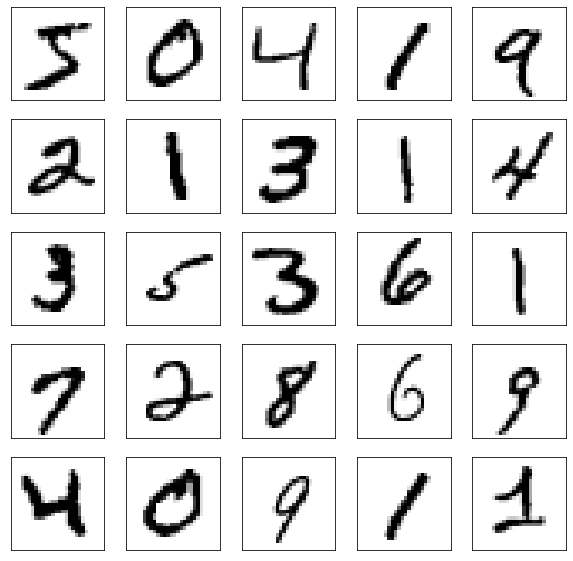

In [4]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)


In [5]:
print("train_images shape = ",train_images.shape)
print("test_images shape = ",test_images.shape)
print("")
print("train_labels shape = ",train_labels.shape)
print("test_labels shape = ",test_labels.shape)

train_images shape =  (60000, 28, 28)
test_images shape =  (10000, 28, 28)

train_labels shape =  (60000,)
test_labels shape =  (10000,)


In [6]:
class_names = []
for i in range(10):
  class_names.append(str(i))

# print(class_names)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print("train_images shape = ",train_images.shape)
print("test_images shape = ",test_images.shape)
print("")
print("train_labels shape = ",train_labels.shape)
print("test_labels shape = ",test_labels.shape)

train_images shape =  (60000, 28, 28, 1)
test_images shape =  (10000, 28, 28, 1)

train_labels shape =  (60000,)
test_labels shape =  (10000,)


# Create a Sequential Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#Traing the CNN

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1939 - accuracy: 0.9396 - val_loss: 0.0720 - val_accuracy: 0.9775
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0403 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0502 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0306 -

In [12]:
predictions = model.predict(test_images)

#Results

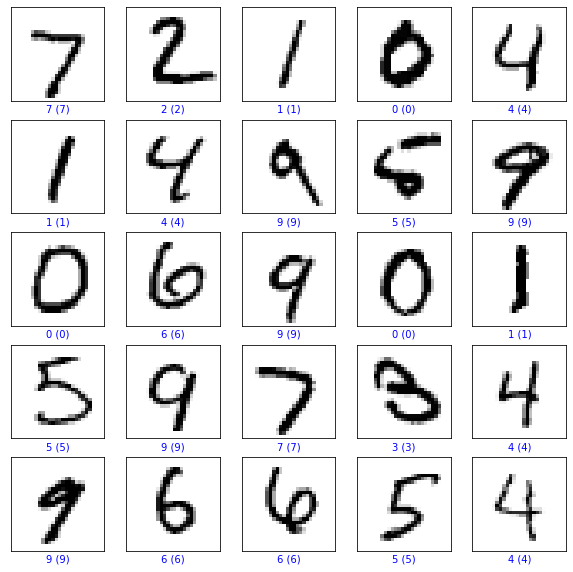

In [13]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i, :, :, 0], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

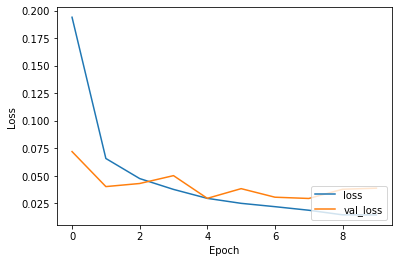

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

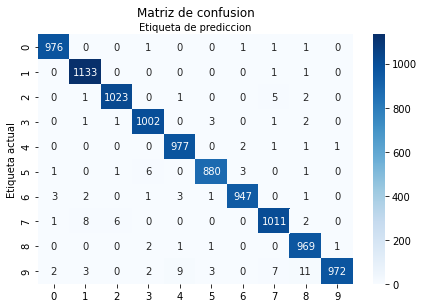

In [15]:
from sklearn import metrics
import seaborn as sns
import pandas as pd


y_pred = np.argmax(model.predict(test_images), axis=-1)
# y_pred =  model.predict_classes(test_images)
y_ref = test_labels

cnf_matrix = metrics.confusion_matrix(y_ref, y_pred)


fig, ax = plt.subplots()
trick_marks = np.arange(len(class_names))
plt.xticks(trick_marks, class_names)
plt.yticks(trick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues' , fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

plt.show()

In [16]:
print('Exactiud =', metrics.accuracy_score(y_ref, y_pred), '; Metrics = Accuracy')

Exactiud = 0.989 ; Metrics = Accuracy
